<a href="https://colab.research.google.com/github/griffith-data-analytics/3803ict-workshops-solutions/blob/main/Lab%209/centrality_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicized text*# Graph Data Analytics

In [ ]:
#!conda install networkx --yes

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


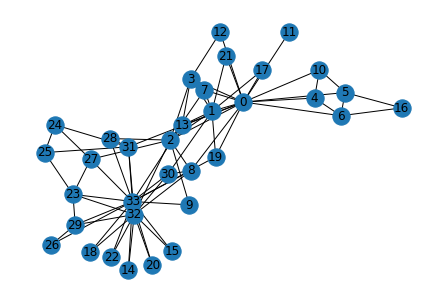

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(nx.info(G))

nx.draw(G, cmap=plt.get_cmap('coolwarm'), with_labels=True)

### Calculate page rank by using simple degree centrality

array([16,  9, 10,  6,  3,  4,  4,  4,  5,  2,  3,  1,  2,  5,  2,  2,  2,
        2,  2,  3,  2,  2,  2,  5,  3,  3,  2,  4,  3,  4,  4,  6, 12, 17])

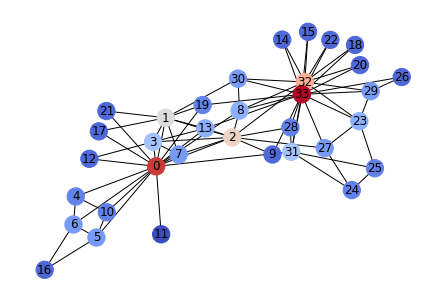

In [ ]:
def simple_pagerank(G):
    p = np.array([G.degree(node) for index, node in enumerate(G.nodes())])
    return p

centralities = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = centralities, with_labels=True)

centralities

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


array([0.05714286, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143])

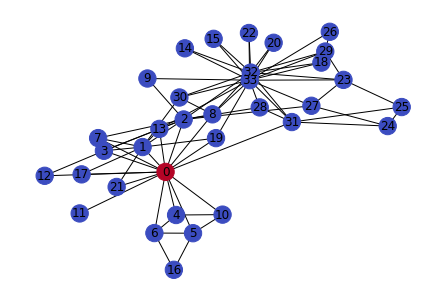

In [ ]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


centralities = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = centralities, with_labels=True)

centralities

In [ ]:
# OPTIONAL

G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

Graph with 6175 nodes and 15969 edges
Graph with 50 nodes and 42 edges


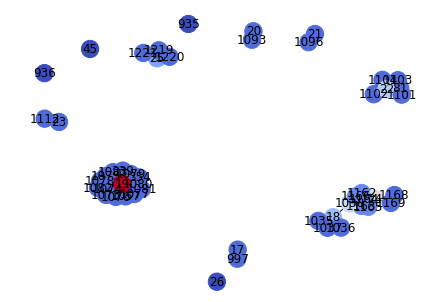

In [ ]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


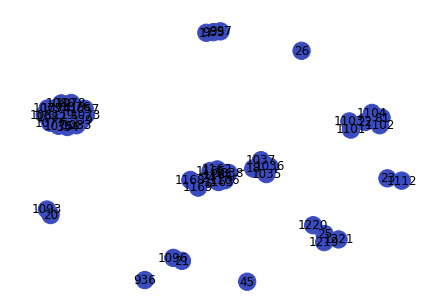

In [ ]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)